In [2]:
import pywt
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray

In [3]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  from matplotlib import pyplot as plt
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))
        
  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

In [4]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):
    from matplotlib import pyplot as plt 
    import matplotlib.gridspec as gridspec
    
    gs = gridspec.GridSpec(nRows, nCols)     
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,10))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')

        plt.subplot(nRows, nCols,i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.title("Image " + str(i))
        plt.axis('off')

    plt.show()

# Câu 1:
##  Thực hiện tất cả các biến đổi wavelet 'db5', 'sym5', 'coif5', 'bior1.3', 'haar' ở mức 1 và 2 (two level decomposition)

C:\Users\Rony\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


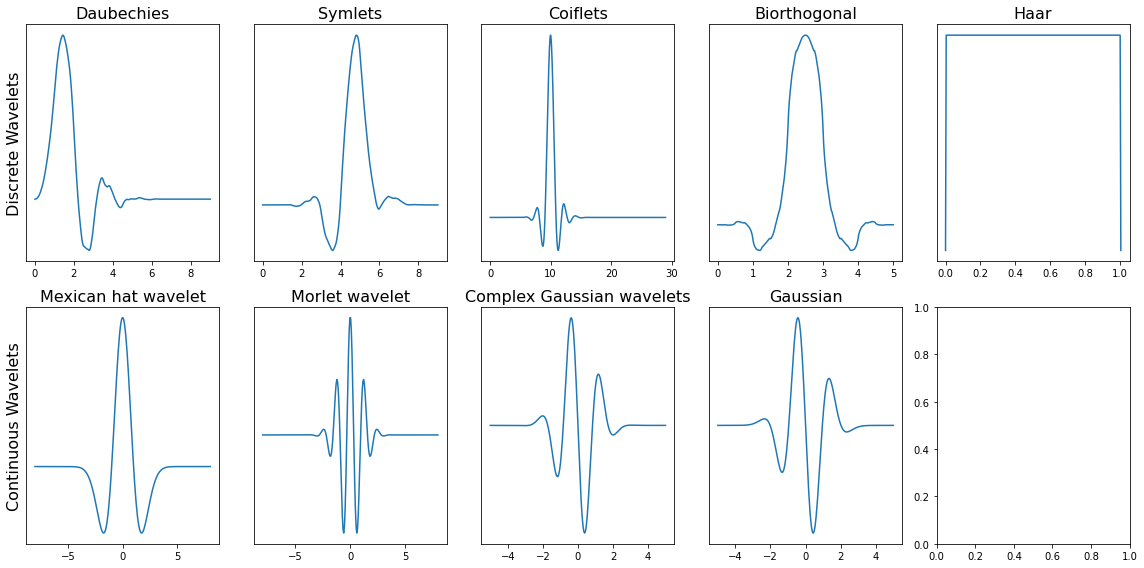

In [5]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior1.3', 'haar']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
 
list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
 
plt.tight_layout()
plt.show()

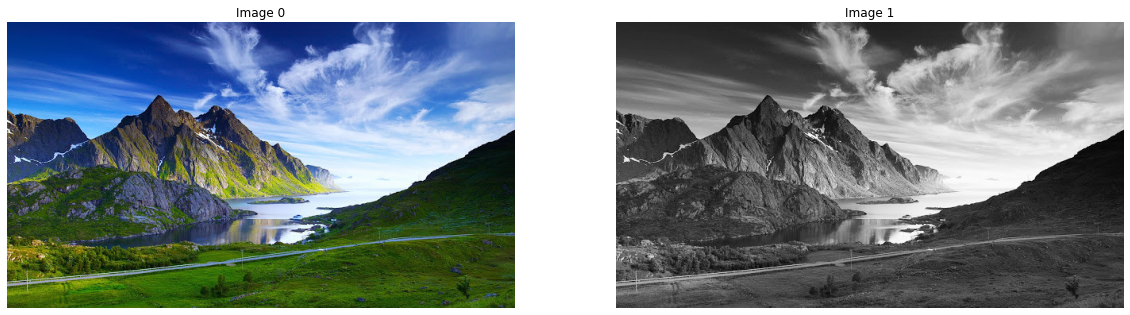

In [6]:
# Read Image 
image_color = imread("mountain.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowImage([image_color, image_gray], 1, 2)

## 1) 'db5':

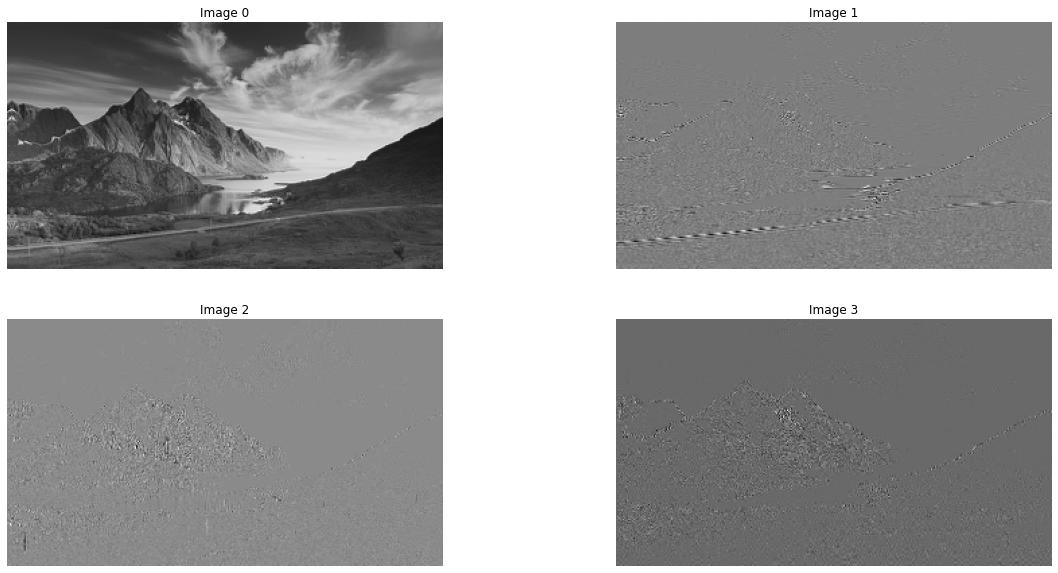

In [7]:
import pywt
import pywt.data
from pywt import dwt2, idwt2


# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = dwt2(image_gray, discrete_wavelets[0])
LL, (LH, HL, HH) = coeffs2

# Display Image
ShowImage([LL, LH, HL, HH], 2, 2)

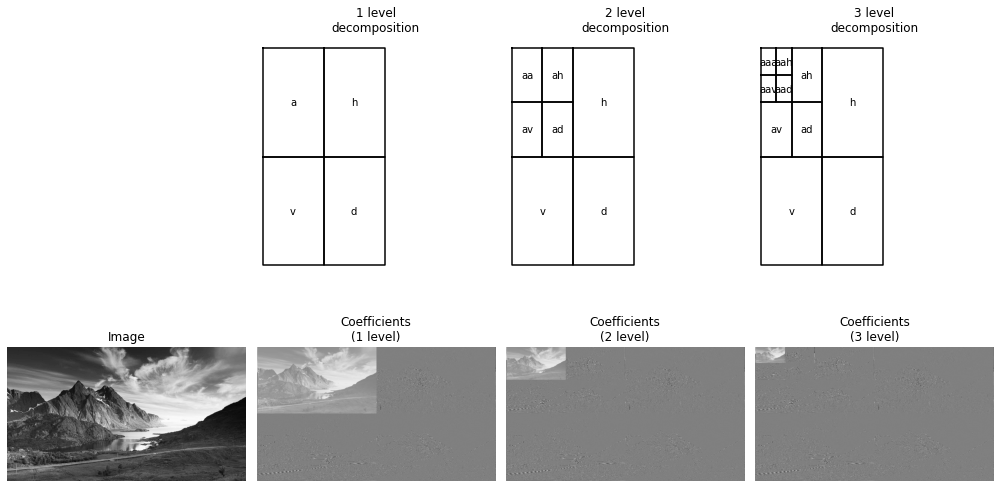

In [8]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = image_gray.astype(np.float32)
shape = x.shape


max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db5', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

## 2) 'sym5'

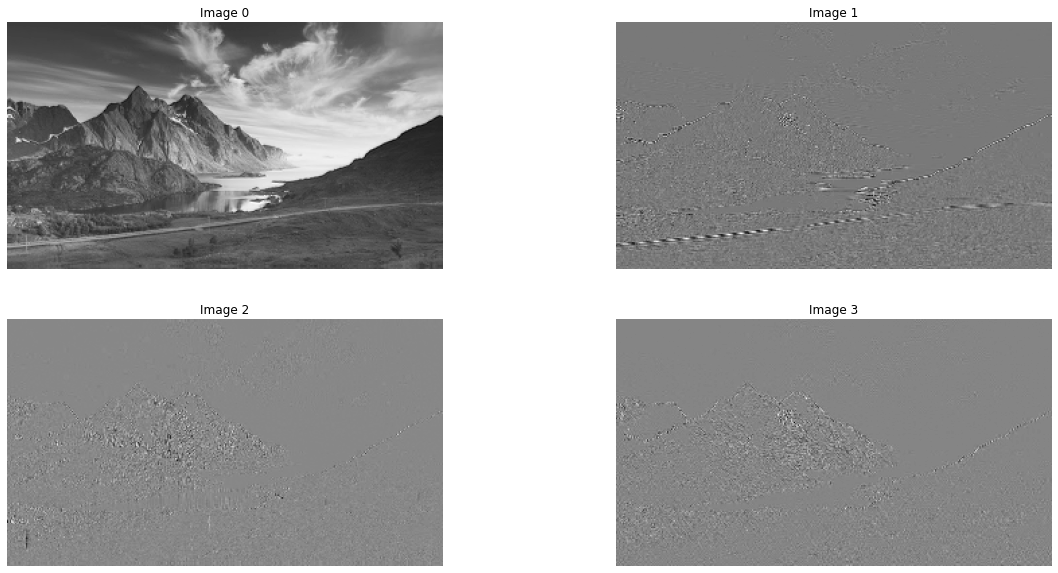

In [9]:
import pywt
import pywt.data
from pywt import dwt2, idwt2


# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = dwt2(image_gray, discrete_wavelets[1])
LL, (LH, HL, HH) = coeffs2

# Display Image
ShowImage([LL, LH, HL, HH], 2, 2)

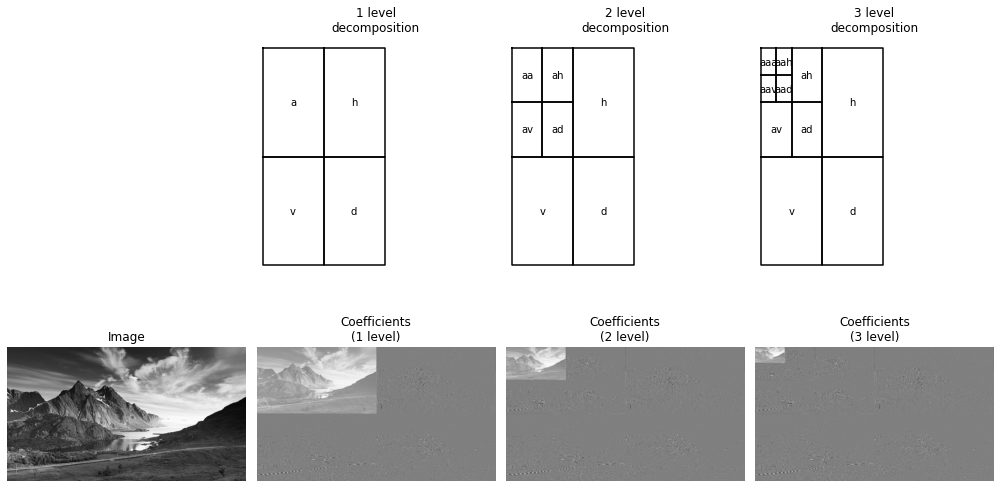

In [10]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = image_gray.astype(np.float32)
shape = x.shape


max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'sym5', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

## 3) 'coif5'

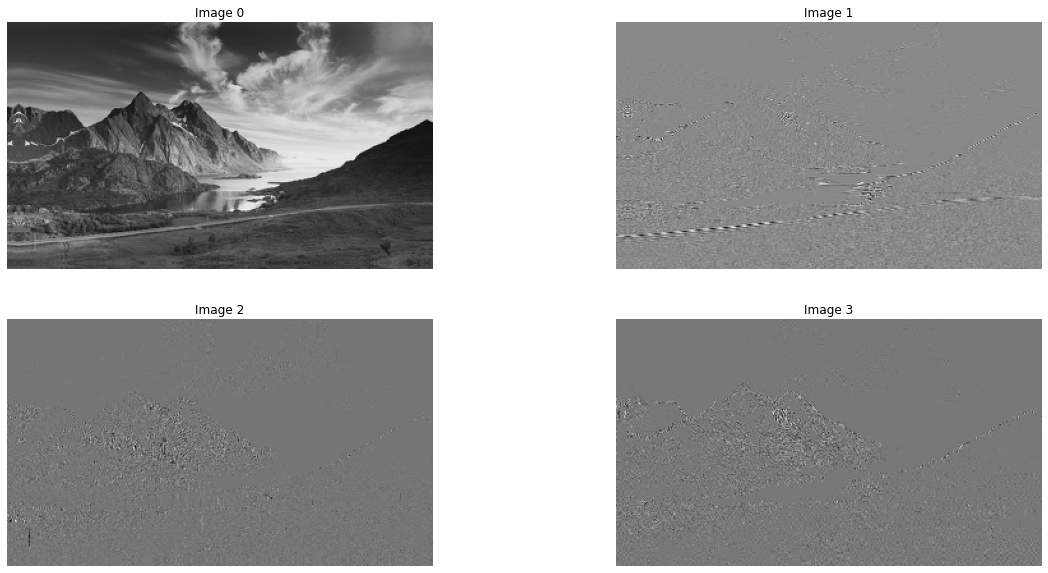

In [11]:
import pywt
import pywt.data
from pywt import dwt2, idwt2


# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = dwt2(image_gray, discrete_wavelets[2])
LL, (LH, HL, HH) = coeffs2

# Display Image
ShowImage([LL, LH, HL, HH], 2, 2)

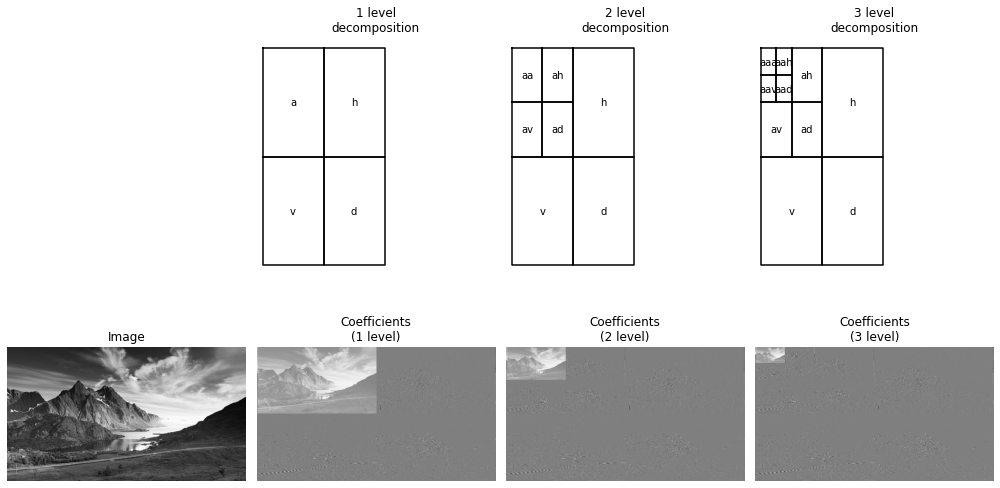

In [12]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = image_gray.astype(np.float32)
shape = x.shape


max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'coif5', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

## 4) 'bior1.3'

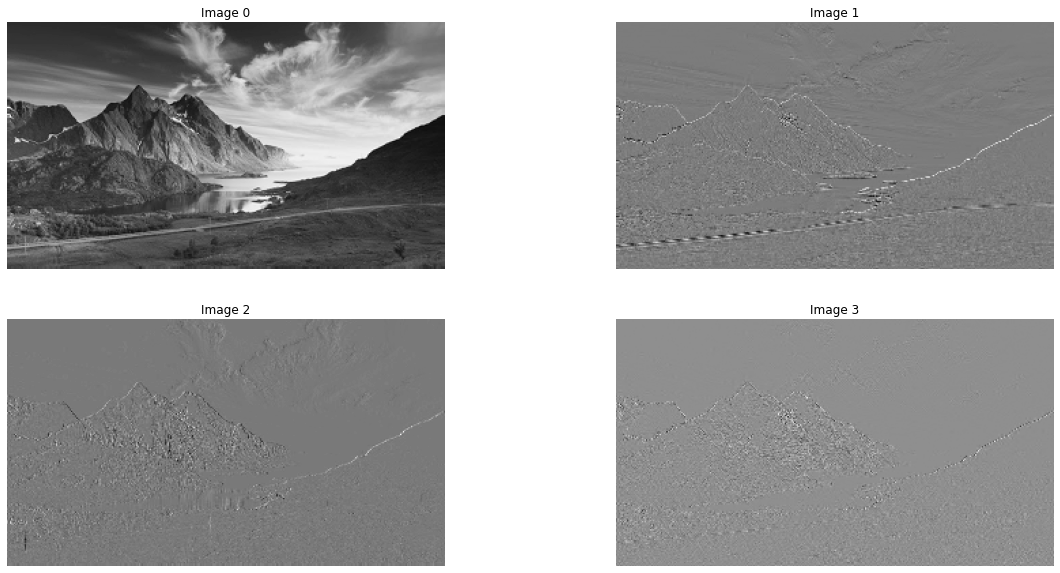

In [13]:
import pywt
import pywt.data
from pywt import dwt2, idwt2


# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = dwt2(image_gray, discrete_wavelets[3])
LL, (LH, HL, HH) = coeffs2

# Display Image
ShowImage([LL, LH, HL, HH], 2, 2)

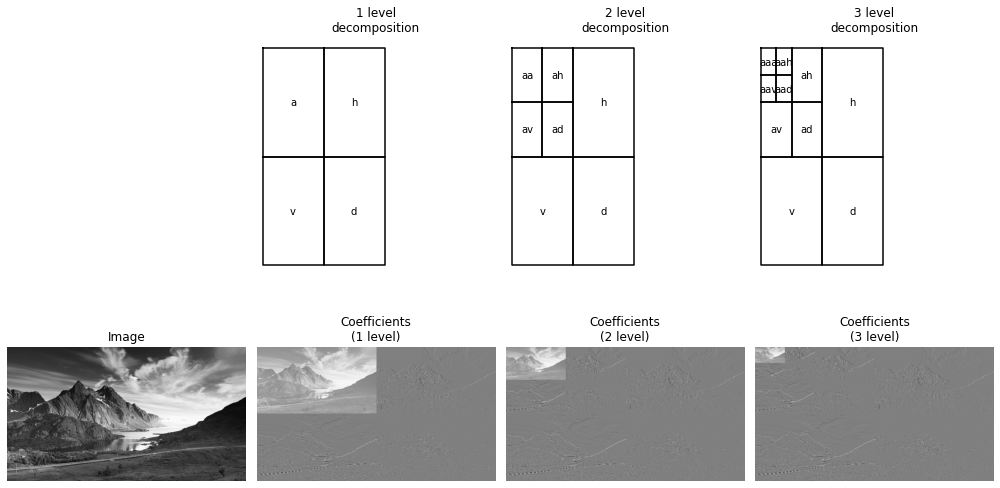

In [14]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = image_gray.astype(np.float32)
shape = x.shape


max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'bior1.3', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

## 5) 'haar'

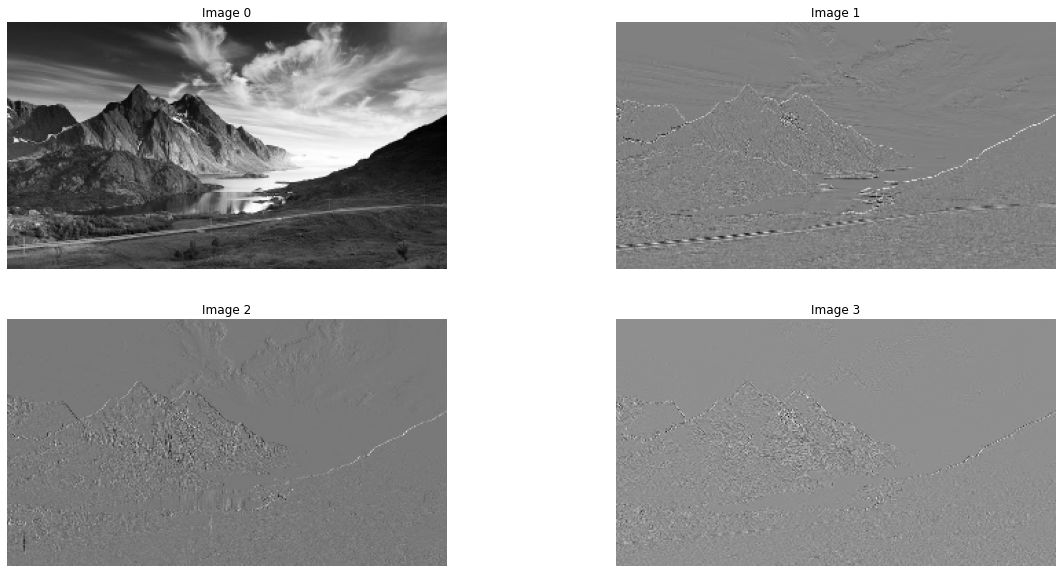

In [15]:
import pywt
import pywt.data
from pywt import dwt2, idwt2


# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = dwt2(image_gray, discrete_wavelets[4])
LL, (LH, HL, HH) = coeffs2

# Display Image
ShowImage([LL, LH, HL, HH], 2, 2)

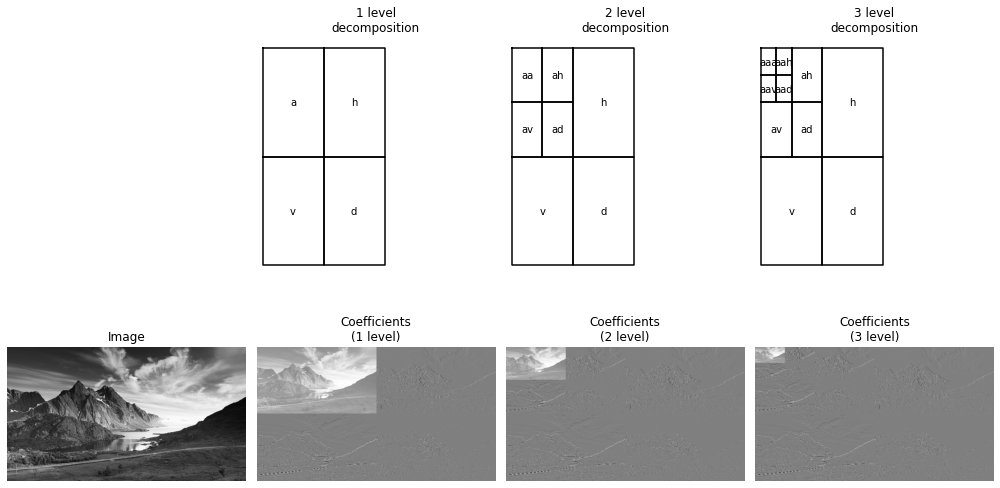

In [16]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = image_gray.astype(np.float32)
shape = x.shape


max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'haar', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

# Câu 2:
## Viết một hàm trong đó truyền các tham số là hình ảnh cẩn biền đổi, function wavelet dùng ('db5', 'sym5', 'coif5', 'bior1.3', 'haar') và level biến đổi. 
## Giá trị trả về là ảnh xấp xỉ và các ảnh detail. Kiểm tra kết quả với một bức ảnh kiếm từ internet  

In [17]:
def transform(img, function_wavelet, level_wavelet):
    image_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
    coeffs2 = dwt2(image_gray, function_wavelet)  
    LL, (LH, HL, HH) = coeffs2
    
    # Display Image
    ShowImage([LL, LH, HL, HH], 2, 2)
    
    cmapList = [cm.gray, cm.jet, cm.rainbow, cm.viridis, cm.cubehelix, cm.RdBu]
    fig = plt.figure(figsize=(20,10))
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=cmapList[5])
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

    fig.tight_layout()
    plt.show()
    
    from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

    x = image_gray.astype(np.float32)
    shape = x.shape


    max_lev = 3       # how many levels of decomposition to draw
    label_levels = level_wavelet  # how many levels to explicitly label on the plots

    fig, axes = plt.subplots(2, 4, figsize=[14, 8])
    for level in range(0, max_lev + 1):
        if level == 0:
            # show the original image before decomposition
            axes[0, 0].set_axis_off()
            axes[1, 0].imshow(x, cmap=plt.cm.gray)
            axes[1, 0].set_title('Image')
            axes[1, 0].set_axis_off()
            continue

        # plot subband boundaries of a standard DWT basis
        draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                         label_levels=label_levels)
        axes[0, level].set_title('{} level\ndecomposition'.format(level))

        # compute the 2D DWT
        c = pywt.wavedec2(x, 'haar', mode='periodization', level=level)
        # normalize each coefficient array independently for better visibility
        c[0] /= np.abs(c[0]).max()
        for detail_level in range(level):
            c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
        # show the normalized coefficients
        arr, slices = pywt.coeffs_to_array(c)
        axes[1, level].imshow(arr, cmap=plt.cm.gray)
        axes[1, level].set_title('Coefficients\n({} level)'.format(level))
        axes[1, level].set_axis_off()

    plt.tight_layout()
    plt.show()
    
    Approximation = LL
    Horizontal = LH
    Vertical = HL
    Diagonal = HH
    
    
    return image_gray, Approximation, Horizontal, Vertical, Diagonal

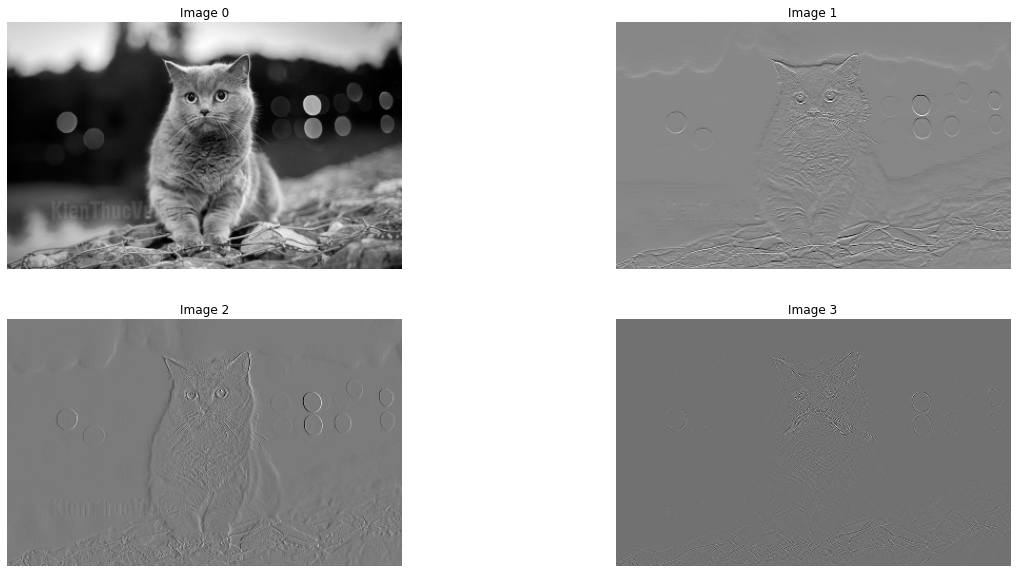

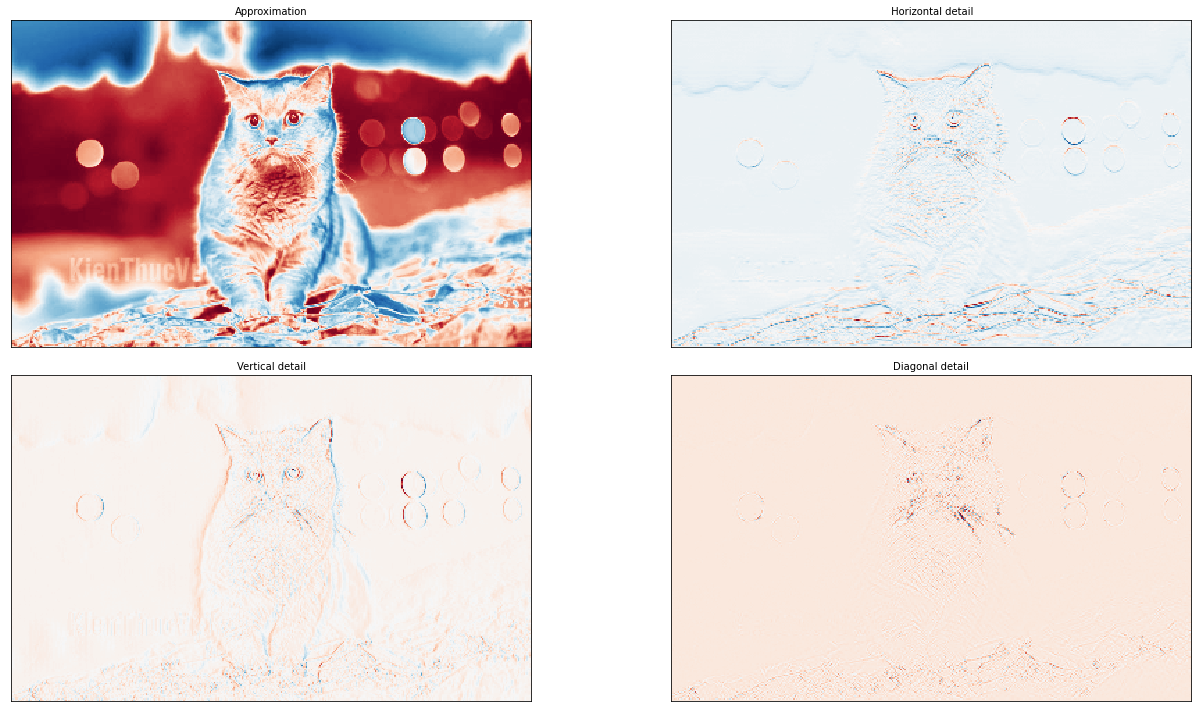

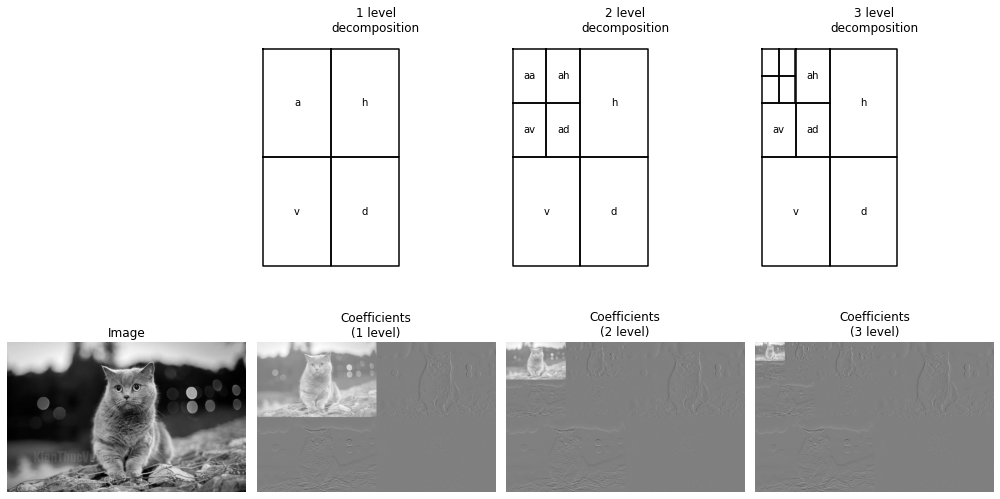

In [18]:
# Read Image 
img = imread("kitty.jpg")
img_gray, approximation, horizontal, vertical, diagonal = transform(img, discrete_wavelets[4], 2)

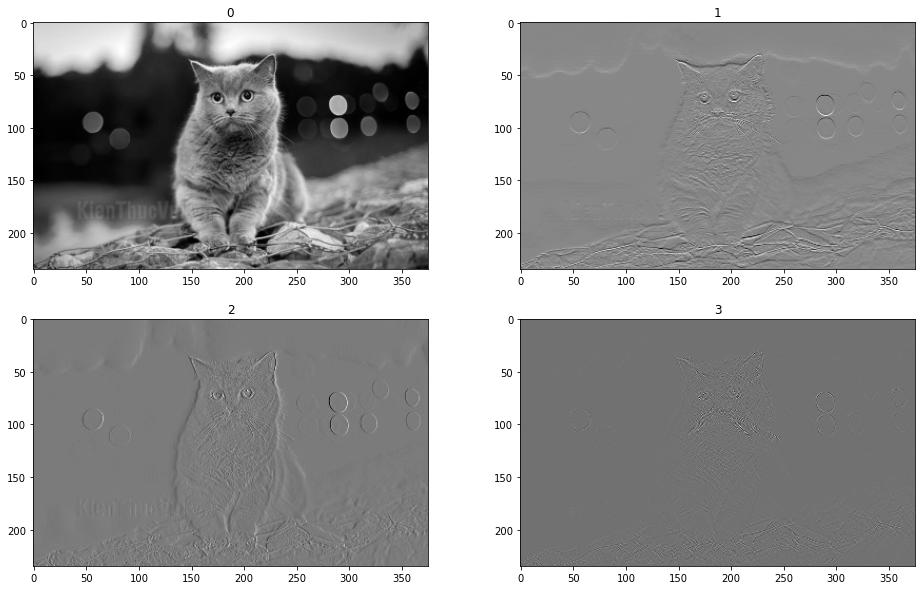

In [19]:
list_img = [approximation, horizontal, vertical, diagonal]
ShowListImages(list_img, 2, 2)

# Câu 3:
## Thực hiện biến đổi wavelet để phân rã thành ảnh xấp xỉ và ảnh detail

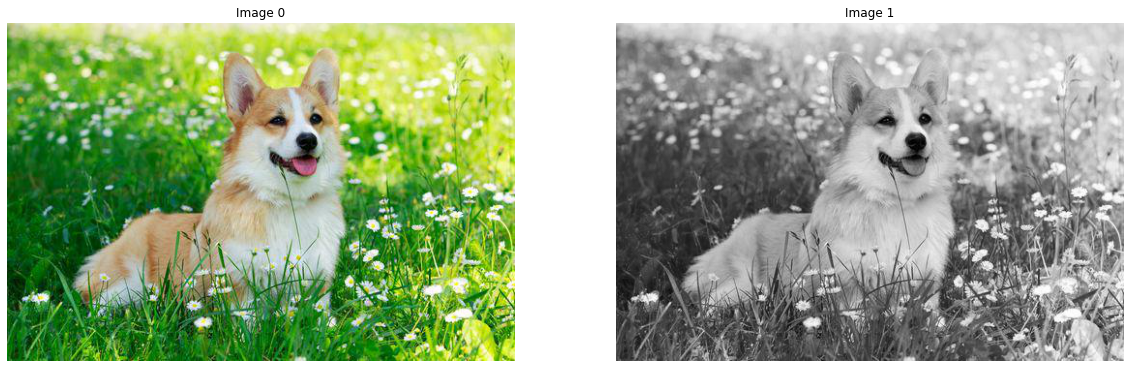

In [21]:
# Read Image 
image_color = imread("corgi.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowImage([image_color, image_gray], 1, 2)

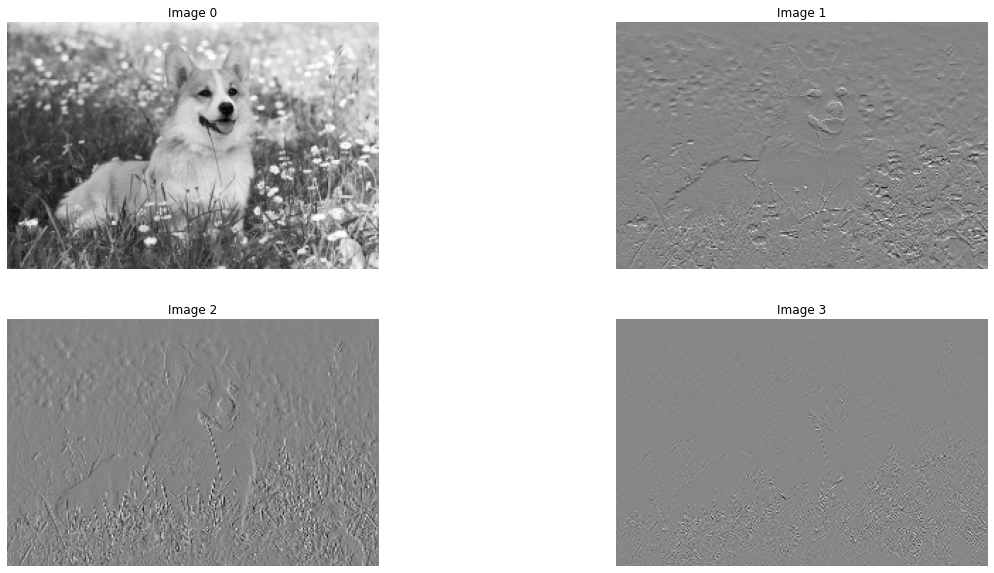

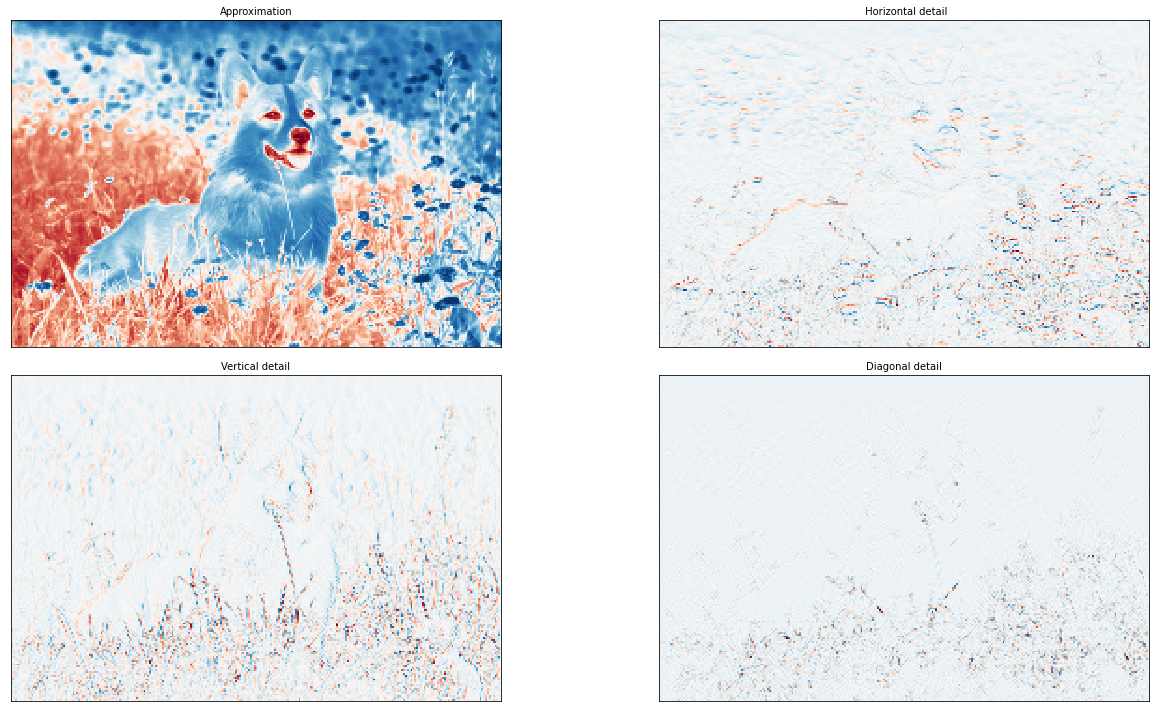

In [22]:
coeffs2 = dwt2(image_gray, discrete_wavelets[4])  
LL, (LH, HL, HH) = coeffs2

# Display Image
ShowImage([LL, LH, HL, HH], 2, 2)

cmapList = [cm.gray, cm.jet, cm.rainbow, cm.viridis, cm.cubehelix, cm.RdBu]
fig = plt.figure(figsize=(20,10))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=cmapList[5])
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()